In [489]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline
plt.style.use('seaborn')

In [490]:
d_set = pd.read_csv('retail_data.csv', encoding='unicode-escape')

In [491]:
d_set.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## Exploring Data:

In [492]:
d_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [493]:
d_set.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [494]:
#Checking for null values:
d_set.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Number of attributes having missing values:2


<AxesSubplot:>

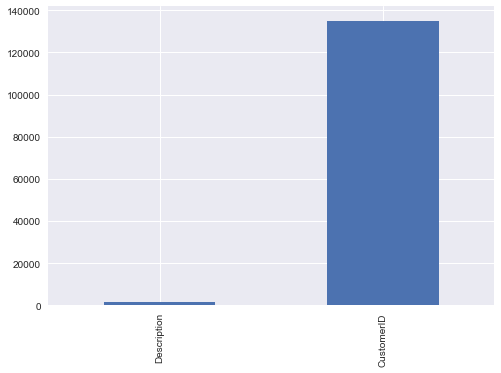

In [495]:
#Bar plot for the missing values:
missing = d_set.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace = True)
print(f'Number of attributes having missing values:' + str(len(missing)))
missing.plot.bar()

## Data Cleaning:

In [496]:
condition_1 = d_set['Quantity'] > 0
condition_2 = d_set['UnitPrice'] > 0
d_set = d_set[condition_1 & condition_2]

In [497]:
d_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 530104 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    530104 non-null  object 
 1   StockCode    530104 non-null  object 
 2   Description  530104 non-null  object 
 3   Quantity     530104 non-null  int64  
 4   InvoiceDate  530104 non-null  object 
 5   UnitPrice    530104 non-null  float64
 6   CustomerID   397884 non-null  float64
 7   Country      530104 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 36.4+ MB


In [498]:
cl_data = d_set.dropna(subset=['CustomerID','Description'])

In [499]:
cl_data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [500]:
cl_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397884 non-null  object 
 1   StockCode    397884 non-null  object 
 2   Description  397884 non-null  object 
 3   Quantity     397884 non-null  int64  
 4   InvoiceDate  397884 non-null  object 
 5   UnitPrice    397884 non-null  float64
 6   CustomerID   397884 non-null  float64
 7   Country      397884 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.3+ MB


In [501]:
cl_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


# Cohort Analysis:

In [502]:
def get_month(x):
    return dt.datetime(x.year,x.month,1)

In [503]:
cl_data['InvoiceDate'] = pd.to_datetime(cl_data['InvoiceDate'])

C:\Users\ozair\AppData\Local\Temp\ipykernel_20996\3399788497.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cl_data['InvoiceDate'] = pd.to_datetime(cl_data['InvoiceDate'])


In [504]:
cl_data['InvoiceMonth'] = cl_data['InvoiceDate'].apply(get_month)

C:\Users\ozair\AppData\Local\Temp\ipykernel_20996\798327625.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cl_data['InvoiceMonth'] = cl_data['InvoiceDate'].apply(get_month)


In [505]:
cl_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01


In [506]:
cl_data['InvoiceMonth'].head(10)

0   2010-12-01
1   2010-12-01
2   2010-12-01
3   2010-12-01
4   2010-12-01
5   2010-12-01
6   2010-12-01
7   2010-12-01
8   2010-12-01
9   2010-12-01
Name: InvoiceMonth, dtype: datetime64[ns]

In [507]:
cl_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     397884 non-null  object        
 1   StockCode     397884 non-null  object        
 2   Description   397884 non-null  object        
 3   Quantity      397884 non-null  int64         
 4   InvoiceDate   397884 non-null  datetime64[ns]
 5   UnitPrice     397884 non-null  float64       
 6   CustomerID    397884 non-null  float64       
 7   Country       397884 non-null  object        
 8   InvoiceMonth  397884 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(1), object(4)
memory usage: 30.4+ MB


In [508]:
grouping = cl_data.groupby('CustomerID')['InvoiceMonth']

In [509]:
cl_data['CohortMonth'] = grouping.transform(min) 

C:\Users\ozair\AppData\Local\Temp\ipykernel_20996\1194746609.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cl_data['CohortMonth'] = grouping.transform(min)


In [510]:
cl_data['CohortMonth']=cl_data['CohortMonth'].dt.date

C:\Users\ozair\AppData\Local\Temp\ipykernel_20996\510981457.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cl_data['CohortMonth']=cl_data['CohortMonth'].dt.date


In [511]:
cl_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01


## Helper Function to get year, month and day values in integer datatype:

In [512]:
def get_date_int(df,column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year,month,day

In [513]:
invoice_year, invoice_month, _ = get_date_int(cl_data,'InvoiceMonth')

In [514]:
cl_data['CohortMonth'] = pd.to_datetime(cl_data['CohortMonth'])

C:\Users\ozair\AppData\Local\Temp\ipykernel_20996\1295132005.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cl_data['CohortMonth'] = pd.to_datetime(cl_data['CohortMonth'])


In [515]:
cohort_year, cohort_month,_ = get_date_int(cl_data,'CohortMonth')

In [516]:
year_diff = invoice_year - cohort_year

In [517]:
months_diff = invoice_month - cohort_month

In [518]:
cl_data['CohortIndex'] = year_diff * 12 + months_diff + 1

C:\Users\ozair\AppData\Local\Temp\ipykernel_20996\893614389.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cl_data['CohortIndex'] = year_diff * 12 + months_diff + 1


In [519]:
cl_data['CohortMonth']=cl_data['CohortMonth'].dt.date

C:\Users\ozair\AppData\Local\Temp\ipykernel_20996\510981457.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cl_data['CohortMonth']=cl_data['CohortMonth'].dt.date


In [520]:
cl_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12-01,2011-08-01,5
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-01,2011-08-01,5
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01,2011-08-01,5
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01,2011-08-01,5


In [521]:
cl_data['CustomerID'].nunique()

4338

##

In [522]:
grouping = cl_data.groupby(['CohortMonth','CohortIndex'])

In [523]:
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique)

In [524]:
cohort_data = cohort_data.reset_index()

In [525]:
cohort_counts = cohort_data.pivot_table(values='CustomerID',index='CohortMonth',columns='CohortIndex')

In [526]:
cohort_counts

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,885.0,324.0,286.0,340.0,321.0,352.0,321.0,309.0,313.0,350.0,331.0,445.0,235.0
2011-01-01,417.0,92.0,111.0,96.0,134.0,120.0,103.0,101.0,125.0,136.0,152.0,49.0,NaN
2011-02-01,380.0,71.0,71.0,108.0,103.0,94.0,96.0,106.0,94.0,116.0,26.0,NaN,NaN
2011-03-01,452.0,68.0,114.0,90.0,101.0,76.0,121.0,104.0,126.0,39.0,NaN,NaN,NaN
2011-04-01,300.0,64.0,61.0,63.0,59.0,68.0,65.0,78.0,22.0,NaN,NaN,NaN,NaN
2011-05-01,284.0,54.0,49.0,49.0,59.0,66.0,75.0,27.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,242.0,42.0,38.0,64.0,56.0,81.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,188.0,34.0,39.0,42.0,51.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,169.0,35.0,42.0,41.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Retention Rate Calculation:

In [527]:
cohort_sizes = cohort_counts.iloc[:,0]

In [528]:
retention = cohort_counts.divide(cohort_sizes,axis = 0)

In [529]:
retention.round(3)*100

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,100.0,36.6,32.3,38.4,36.3,39.8,36.3,34.9,35.4,39.5,37.4,50.3,26.6
2011-01-01,100.0,22.1,26.6,23.0,32.1,28.8,24.7,24.2,30.0,32.6,36.5,11.8,NaN
2011-02-01,100.0,18.7,18.7,28.4,27.1,24.7,25.3,27.9,24.7,30.5,6.8,NaN,NaN
2011-03-01,100.0,15.0,25.2,19.9,22.3,16.8,26.8,23.0,27.9,8.6,NaN,NaN,NaN
2011-04-01,100.0,21.3,20.3,21.0,19.7,22.7,21.7,26.0,7.3,NaN,NaN,NaN,NaN
2011-05-01,100.0,19.0,17.3,17.3,20.8,23.2,26.4,9.5,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,17.4,15.7,26.4,23.1,33.5,9.5,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,18.1,20.7,22.3,27.1,11.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,20.7,24.9,24.3,12.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


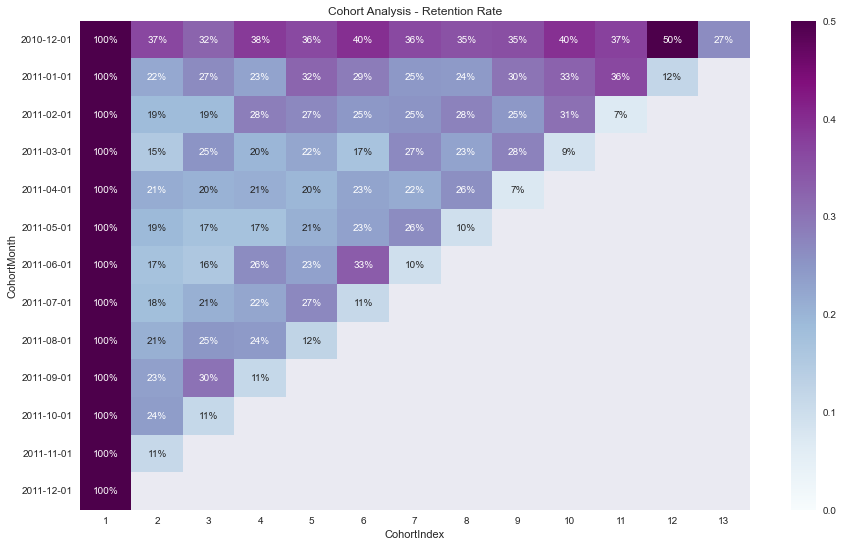

In [530]:
plt.figure(figsize = (15,9))
plt.title('Cohort Analysis - Retention Rate')
sns.heatmap(data = retention, 
            annot = True, 
            fmt = '.0%', 
            vmin = 0.0,
            vmax = 0.5,
            cmap = "BuPu")
plt.show()

## Average Quantity

In [531]:
grouping = cl_data.groupby(['CohortMonth','CohortIndex'])

In [532]:
cohort_data = grouping['Quantity'].mean()

In [533]:
cohort_data = cohort_data.reset_index()
average_quantity = cohort_data.pivot(index='CohortMonth',columns='CohortIndex',values='Quantity')

In [534]:
average_quantity.round(1)

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,11.9,15.6,15.6,15.8,13.5,14.8,16.0,15.5,18.1,17.6,18.9,13.4,15.3
2011-01-01,17.2,13.3,12.6,15.1,12.8,15.3,14.9,14.8,11.6,10.5,9.4,10.0,NaN
2011-02-01,11.1,13.5,19.0,12.0,12.3,12.3,13.5,13.3,10.9,12.3,13.4,NaN,NaN
2011-03-01,9.9,11.7,13.3,10.1,14.3,13.0,13.4,13.7,11.2,9.5,NaN,NaN,NaN
2011-04-01,10.0,10.4,9.8,11.8,11.8,8.6,9.9,9.5,7.4,NaN,NaN,NaN,NaN
2011-05-01,11.3,9.6,14.1,12.8,11.1,8.7,10.6,109.9,NaN,NaN,NaN,NaN,NaN
2011-06-01,10.6,14.5,10.8,13.5,10.6,9.8,9.4,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,9.8,13.8,7.3,8.1,6.1,7.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,10.0,6.2,5.4,6.2,7.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


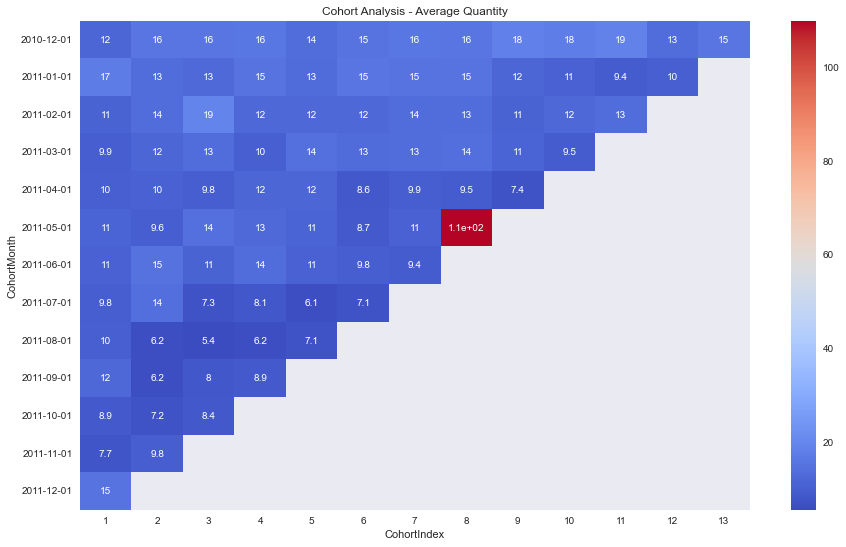

In [535]:
plt.figure(figsize = (15,9))
plt.title('Cohort Analysis - Average Quantity')
sns.heatmap(data = average_quantity, 
            annot = True, 
            cmap = "coolwarm")
plt.show()

## Average Sales

In [536]:
cl_data['TotalSales'] = cl_data['UnitPrice'] * cl_data['Quantity']

C:\Users\ozair\AppData\Local\Temp\ipykernel_20996\158672474.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cl_data['TotalSales'] = cl_data['UnitPrice'] * cl_data['Quantity']


In [537]:
cl_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex,TotalSales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01,1,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01,1,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12-01,2011-08-01,5,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-01,2011-08-01,5,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01,2011-08-01,5,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01,2011-08-01,5,16.60


In [538]:
cohort_data = grouping['TotalSales'].mean().reset_index()

In [539]:
average_sales  = cohort_data.pivot_table(index = 'CohortMonth',columns = 'CohortIndex',values = 'TotalSales').round(1)
average_sales

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,21.9,27.1,26.6,26.9,21.0,27.9,28.1,27.2,29.1,33.2,33.7,23.3,25.6
2011-01-01,26.6,24.8,20.8,30.9,22.4,26.1,25.1,25.2,19.0,22.1,19.4,19.3,NaN
2011-02-01,17.7,20.6,21.3,19.3,17.6,16.9,22.1,22.8,18.6,22.0,23.5,NaN,NaN
2011-03-01,17.5,21.0,22.6,18.0,21.1,18.9,21.9,19.8,16.6,12.9,NaN,NaN,NaN
2011-04-01,16.9,21.0,19.5,18.7,19.3,14.8,15.1,15.7,12.1,NaN,NaN,NaN,NaN
2011-05-01,20.3,17.1,22.0,20.9,18.5,14.0,16.8,226.6,NaN,NaN,NaN,NaN,NaN
2011-06-01,23.8,16.0,19.8,20.3,15.2,16.5,13.1,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,14.8,23.5,11.7,12.8,10.8,11.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,16.4,13.1,12.5,15.9,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [540]:
cl_data['CohortMonth'].head()

0    2010-12-01
1    2010-12-01
2    2010-12-01
3    2010-12-01
4    2010-12-01
Name: CohortMonth, dtype: object

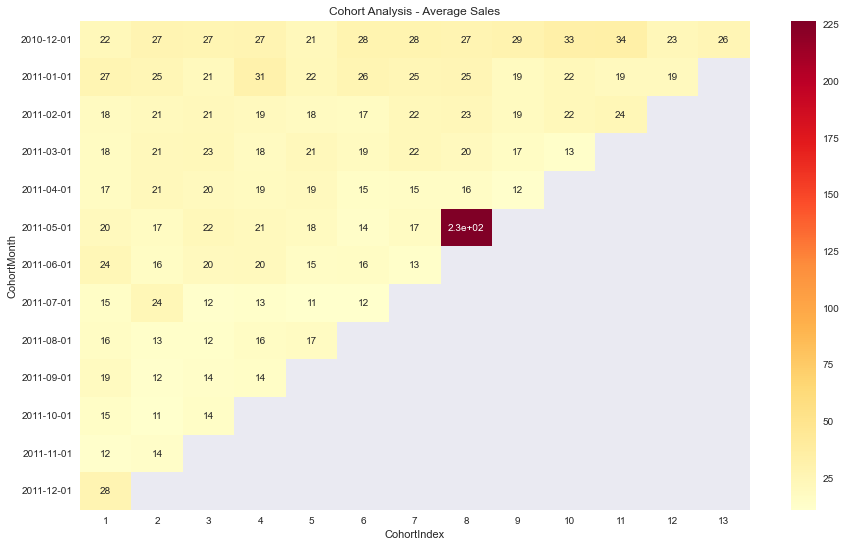

In [543]:
plt.figure(figsize = (15,9))
plt.title('Cohort Analysis - Average Sales')
sns.heatmap(data = average_sales, 
            annot = True, 
            cmap = "YlOrRd",
           yticklabels=True)
plt.show()

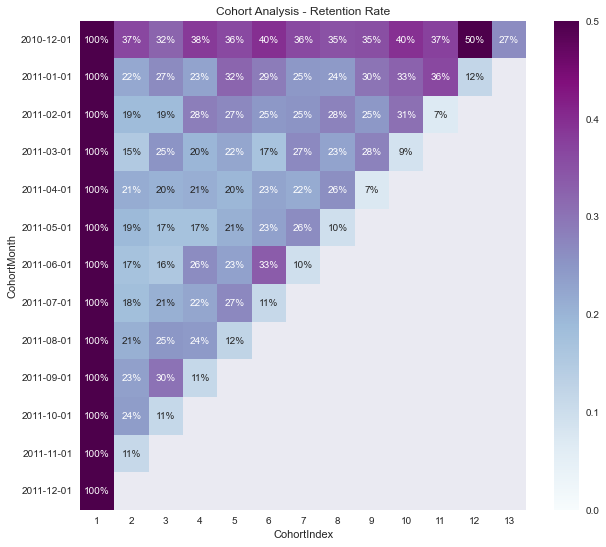

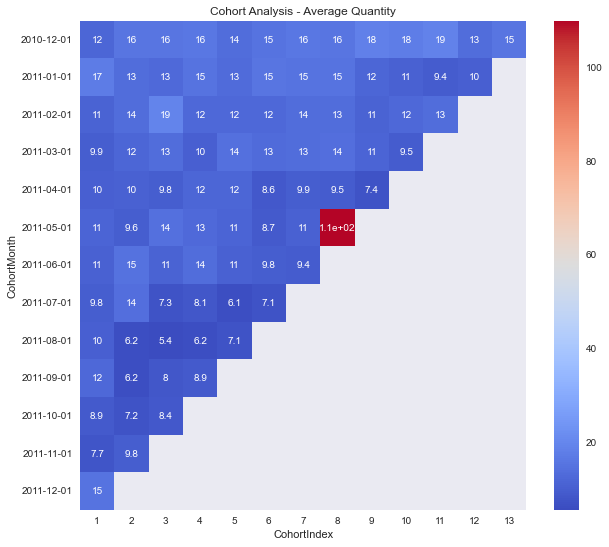

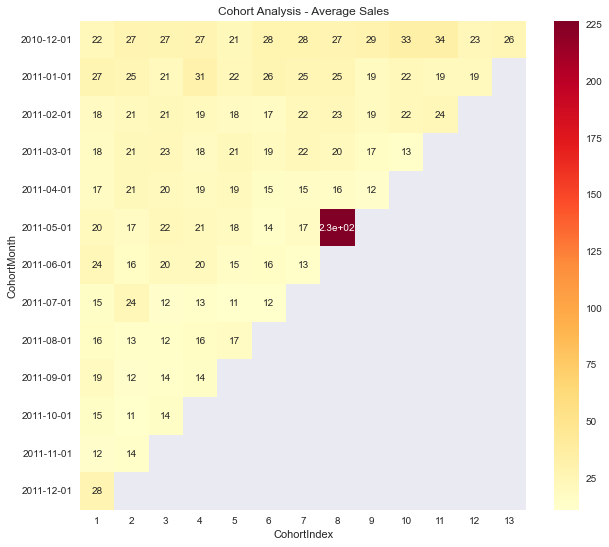

In [542]:
plt.figure(figsize = (10,9))
plt.title('Cohort Analysis - Retention Rate')
sns.heatmap(data = retention, 
            annot = True, 
            fmt = '.0%', 
            vmin = 0.0,
            vmax = 0.5,
            cmap = "BuPu")

plt.figure(figsize = (10,9))
plt.title('Cohort Analysis - Average Quantity')
sns.heatmap(data = average_quantity, 
            annot = True, 
            cmap = "coolwarm")
plt.show()

plt.figure(figsize = (10,9))
plt.title('Cohort Analysis - Average Sales')
sns.heatmap(data = average_sales, 
            annot = True, 
            cmap = "YlOrRd")
plt.show()